## Guide to creating custom retail datasets

### Step 1.  Foreground Images (bottles, boxes, etc).

1. Download and save the image as **.png**. 
2. Follow any one of the methods on this page [page](https://www.colorexpertsbd.com/blog/remove-image-background-using-gimp) to remove the background and isolate the object alone. I prefer the **Fuzzy Selection Tool** method.
3. Once the background is removed, resize the canvas size to fit the image **as tight as possible**. Select **Image > Canvas Size** from the tool bar and input the appropriate height and width. Also click the **centre** button to ensure that the image is present at the centre of the canvas. Note down the **height and width** of the resized canvas.
4. Save the image as a png in the **img_templates** folder under a suitable category. (Use **File > Export As**).

The foreground object image should ideally look like this in GIMP after you are done with all the processing:

<img src="demo_imgs/final_fr_img.PNG" alt="drawing" width="400"/>



### Step 2: Background images

1. While adding a new background image the most important point that you need to keep in mind is that data generation script expects a constant shelf height. 

**Ideal Background**:

<img src="demo_imgs/ideal_bg.jpg" alt="drawing" width="400"/>

** Non ideal**
<img src="demo_imgs/non_ideal_bg.jpg" alt="drawing" width="200"/>

For non ideal cases we may have to apply some perspective transformations to rectify the orientation. (In progress)

2. Once you have a background that satisfies the above criteria, open the image in GIMP (or any other image editing software) and note down the following properties.

    - number of shelves
    - the shelf region: The top-left and bottom-right points of the region where you need the foreground objects to be placed.
    - shelf height: Height in pixels between two consecutive shelves.
    - shelf positions: The y coordinate of each shelf top.

For example:
<img src="demo_imgs/bg_measures.jpg" alt="drawing" width="600"/>
   

### Step 3: Add these images to the config.

1. Once you have a new foreground/ background image after completing the above steps, you need to add it to the collection.

#### Adding Foreground Images
1. Copy the transparent .png created in **Step 1** to the appropriate folder inside **img_templates/foregrounds/**. Make sure that it has a unique name (label).

2. Use the template manager script to register the image config and add the image to the foreground image collection.


#### Adding Background Images
1. Copy the background image created in **Step 2** to the appropriate folder inside **img_templates/backgrounds/**. Make sure that it has a unique name (label).

2. Use the template manager script to register the image config and add the image to the background image collection.

**Examples:**

In [22]:
# importing the Template Manager module
from src.template_manager.template_manager import TemplateManager
# creating the manager instance
mgr = TemplateManager(config_path="config/")

In [23]:
# Adding background image.

# Using the values obtained during Step-2
background_args = {
    "shelf_region" : ((96,11),(695, 887)),
    "shelf_ht" : 165,
    "num_shelves" : 5,
    "shelf_y_positions":(157,341,525,710,887)
}

# !!!! The label should be the same as the image name
mgr.add_template(label="small_shelf_stock",template_type="background",**background_args)

New background object small_shelf_stock configured.


In [6]:
# Deleting background image.
mgr.del_template(label="large_shelf_stock",template_type="background")

background object large_shelf_stock removed.


In [14]:
# Adding new foreground category.

mgr.add_foreground_category(category="bottles")

New foreground category bottles added.


In [16]:
# Deleting foreground category.
mgr.del_foreground_category(category="bottles")

Removed category bottles and all associated objects.


In [16]:
# Adding new foreground template.
# Using the values obtained during Step-1
foreground_args={
    "category":"bottles",
    "height":600,
    "width":180
}

# !!!! The label should be the same as the image name
mgr.add_template(label="bottle_16",template_type="foreground",**foreground_args)

New foreground object bottle_16 configured.


In [10]:
# Deleting foreground image.
mgr.del_template(label="bottle_11",template_type="foreground", category="bottles")

foreground object bottle_11 removed.


### Step 4: Generating the dataset

In [1]:
# Importing the synthesizer module
from src.data_synthesizer.data_synthesizer import DataSynthesizer

In [2]:
# Initializing the instance
config_path = "config/"
template_path = "img_templates/" #where the foreground and background templates are locatied
data_path = "data/" #where to save the data
synthesizer = DataSynthesizer(config_path, template_path, data_path)

In [6]:
# Generating the data
"""
The synthesizer takes the following parameters:
    n: integer specifying the number of images needed
    categories (default: ["bottles"]): An array specifying the categories from which objects will be selected.
                                       Should match the keys in the foreground config file.
    rot_pc (default=0.1): Proportion of rotated images
    x_offset (default=1 px): Integer value specifying the number of pixels present between two images.
    obj_sizes_allowed (default=[["s", "m", "l"]]): An array specifying the allowed variation in sizes for the objects.
                                                   s=small, m=medium and l=large
    max_objs_in_pack (default=3): Max number of objects in a pack (appearing consecutively).
"""

synthesizer.generate_synthetic_dataset(n=1,
                                       categories = ["bottles", "bags","boxes"],
                                       rot_pc =[0.1],
                                       max_objs_in_pack=5,
                                       x_offset=50)

Generating image 1 of 1
Done.


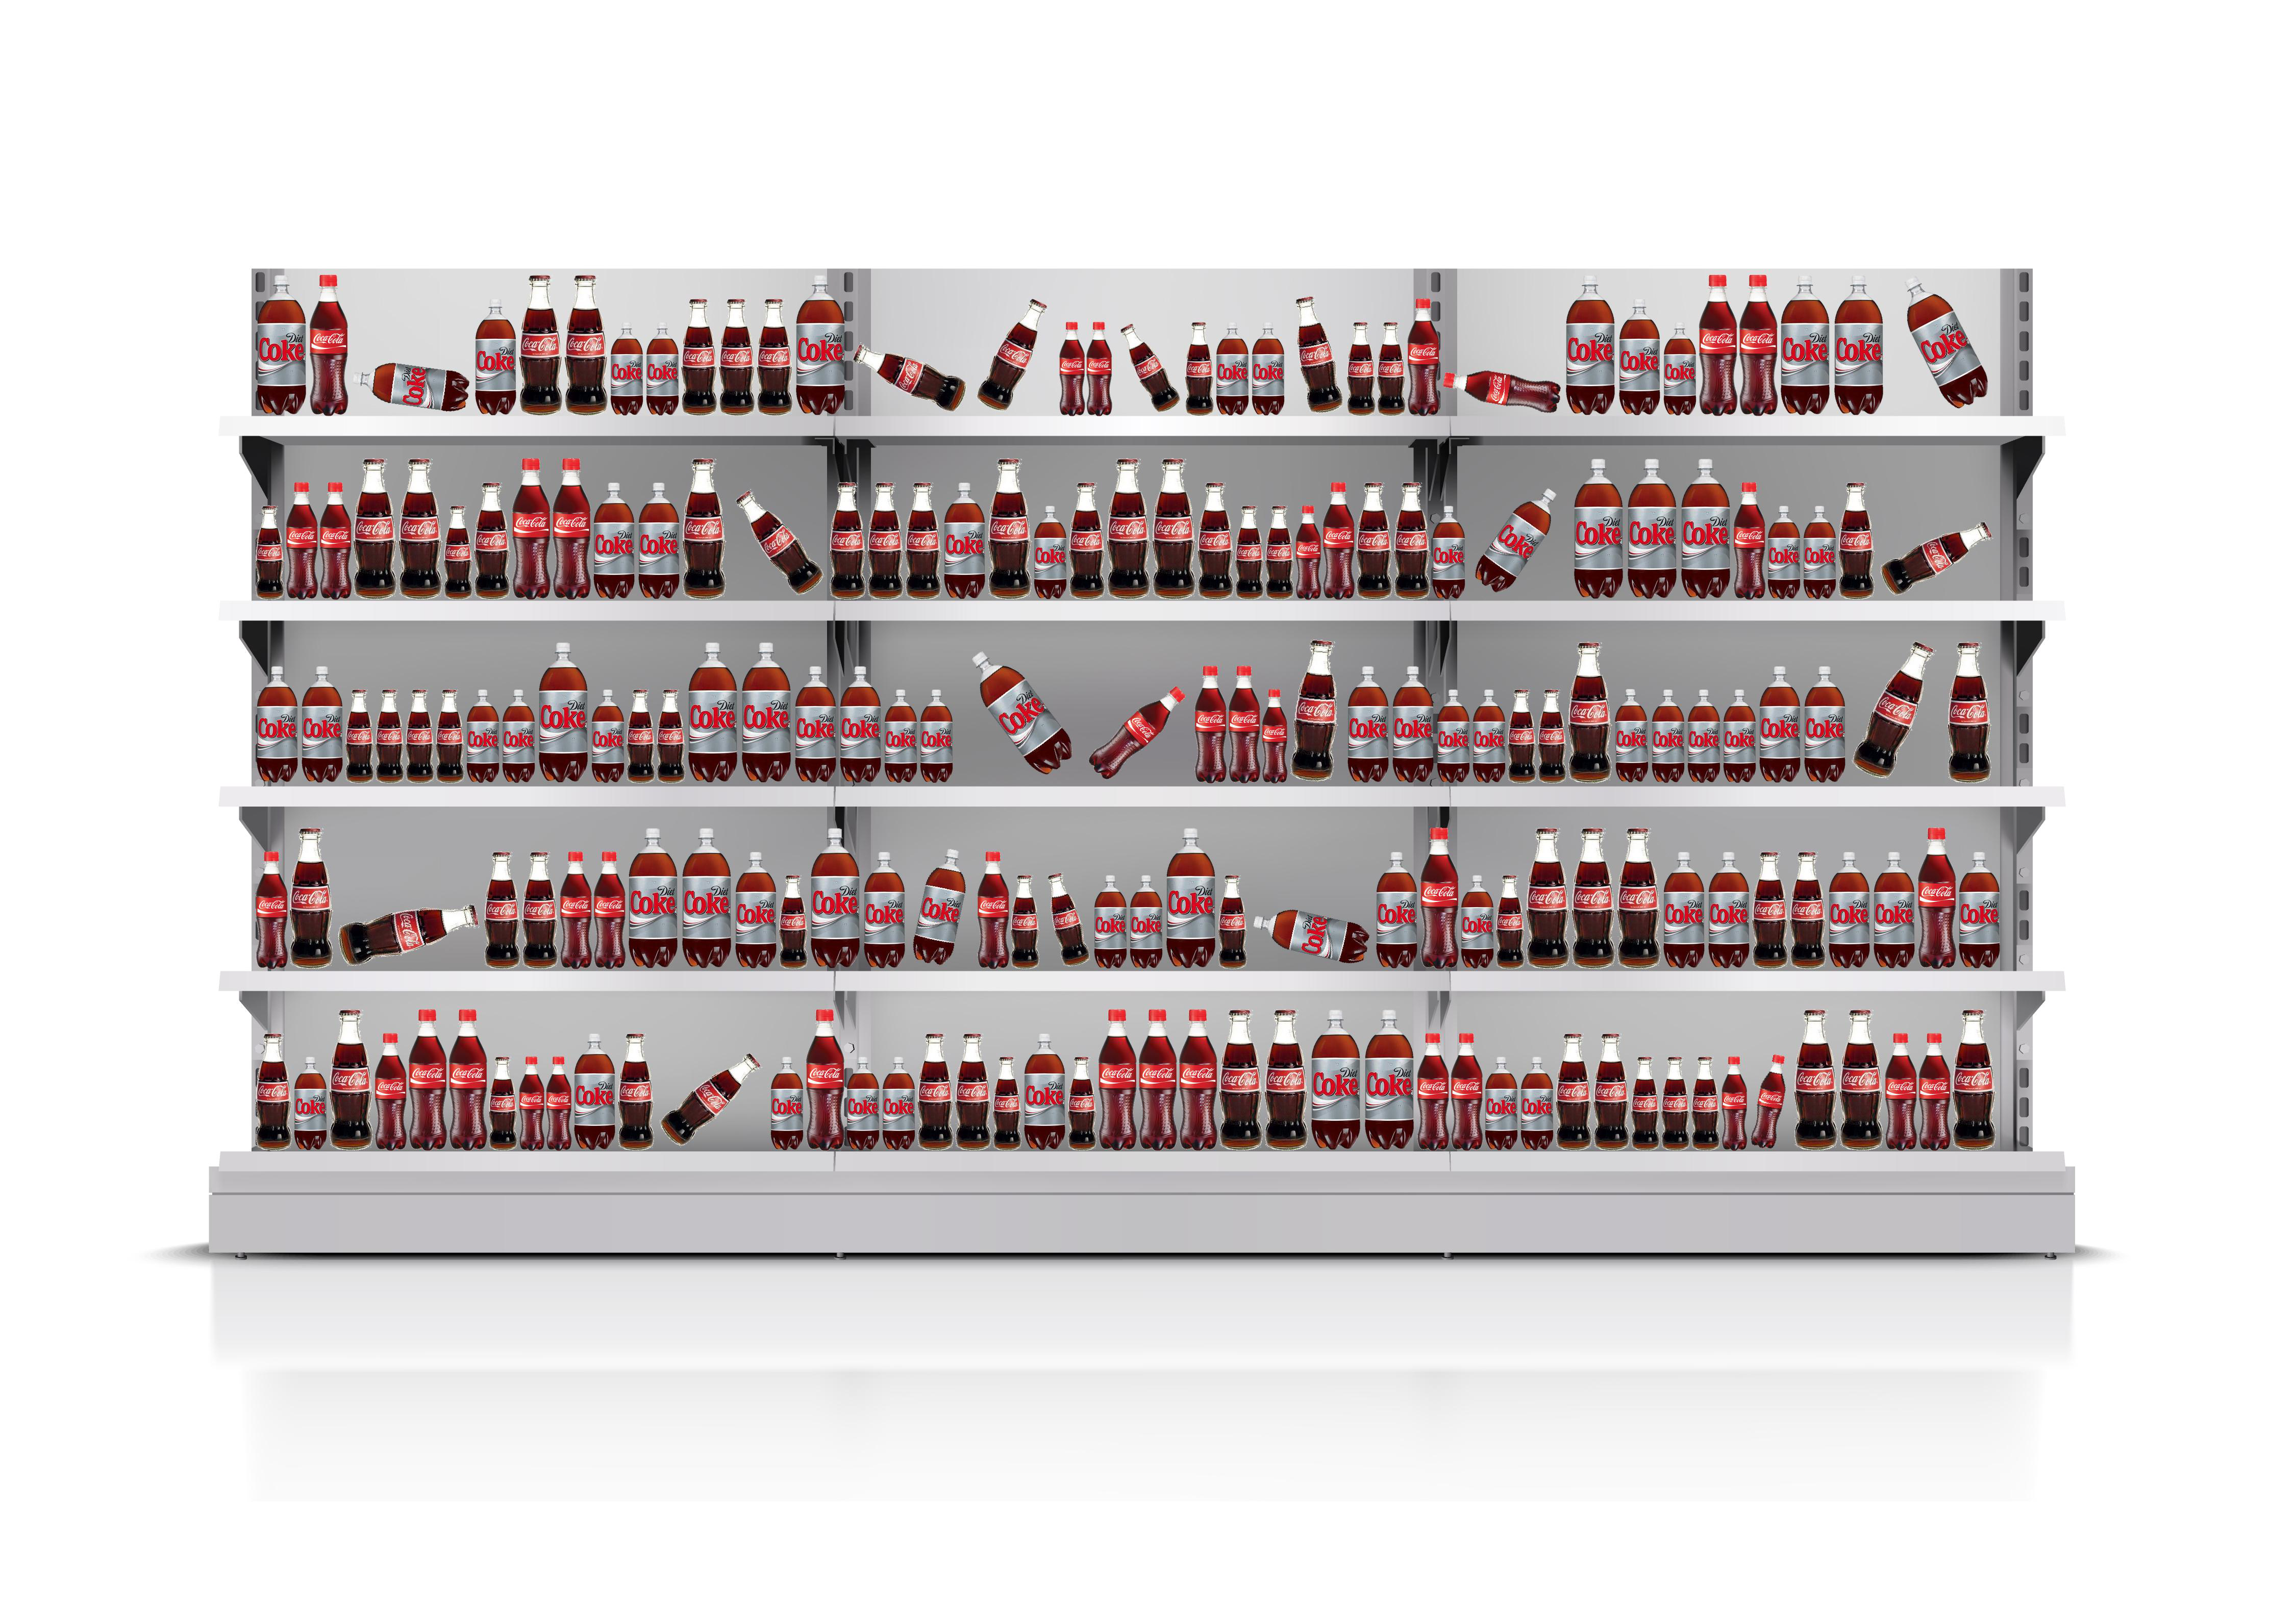

In [4]:
from PIL import Image
synth_img = Image.open(
    "data/synth_data_2019_01_09_22_45_08/image_0_2019_01_09_22_45_08/train_image/image_0_2019_01_09_22_45_08.jpg")
synth_img